In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score

from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.svm import SVC
from sklearn.svm import SVR

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('ggplot')

mpl.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings("ignore")

In [50]:
def plot_cv_results(cv_results, param_x, param_z, metric = 'mean_test_score'):
    """
    cv_results - cv_results_ attribute of a GridSearchCV instance (or similar)
    param_x - name of grid search parameter to plot on x axis
    param_z - name of grid search parameter to plot by line color
    """
    cv_results = pd.DataFrame(cv_results)
    col_x = 'param_' + param_x
    col_z = 'param_' + param_z
    fig, ax = plt.subplots(1, 1, figsize=(11, 8))
    g = sns.barplot(x=col_x, y=metric, hue=col_z, data=cv_results, ci='sd', ax=ax) 
    ax.set_title("CV Grid Search Results")
    g.set(ylim=(0.0,1.0))
    ax.set_xlabel(param_x)
    ax.set_ylabel('Balanced_accuracy')
    ax.legend(title=param_z)
    return fig

In [51]:
def plot_cv_results_reg(cv_results, param_x, param_z, metric = 'mean_test_score'):
    """
    cv_results - cv_results_ attribute of a GridSearchCV instance (or similar)
    param_x - name of grid search parameter to plot on x axis
    param_z - name of grid search parameter to plot by line color
    """
    cv_results = pd.DataFrame(cv_results)
    col_x = 'param_' + param_x
    col_z = 'param_' + param_z
    fig, ax = plt.subplots(1, 1, figsize=(11, 8))
    g = sns.barplot(x=col_x, y=metric, hue=col_z, data=cv_results, ci='sd', ax=ax) 
    ax.set_title("CV Grid Search Results")
    g.set(ylim=(-1.0,0.0))
    ax.set_xlabel(param_x)
    ax.set_ylabel('Neg_MSE')
    ax.legend(title=param_z)
    return fig

# DILI

1    54.447439
0    45.552561
Name: DILI, dtype: float64


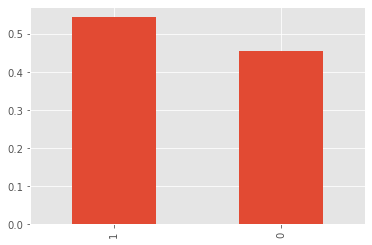

In [125]:
df_raw = pd.read_csv('DILI/final/DILI_GSD.csv', index_col=0) # Need to input Binary class Data
df_raw

df_raw.DILI.value_counts(normalize=True).plot(kind='bar')
print(df_raw.DILI.value_counts(normalize=True)*100)

df = df_raw.iloc[:, 3:]
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [126]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [127]:
params_rf = {
    'max_depth' : [2,3,4,5,6],
    'n_estimators' : [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
}

In [192]:
rfc = RandomForestClassifier()
grid_tree = GridSearchCV(rfc, params_rf, scoring='balanced_accuracy', cv=5, refit = True, n_jobs=5)
grid_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=5,
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800, 900, 1000]},
             scoring='balanced_accuracy')

In [193]:
print('best parameters : ', grid_tree.best_params_)
# print('best score : ', grid_tree.best_score_)
em = grid_tree.best_estimator_
pred = em.predict(X_val)
print('accuracy: ', accuracy_score(y_val, pred))
print('balanced accuracy: ', balanced_accuracy_score(y_val, pred))
print('recall: ', recall_score(y_val, pred))
print('precision: ', precision_score(y_val, pred))
print('F1: ', f1_score(y_val, pred))

best parameters :  {'max_depth': 6, 'n_estimators': 400}
accuracy:  0.9798206278026906
balanced accuracy:  0.7
recall:  0.4
precision:  1.0
F1:  0.5714285714285715


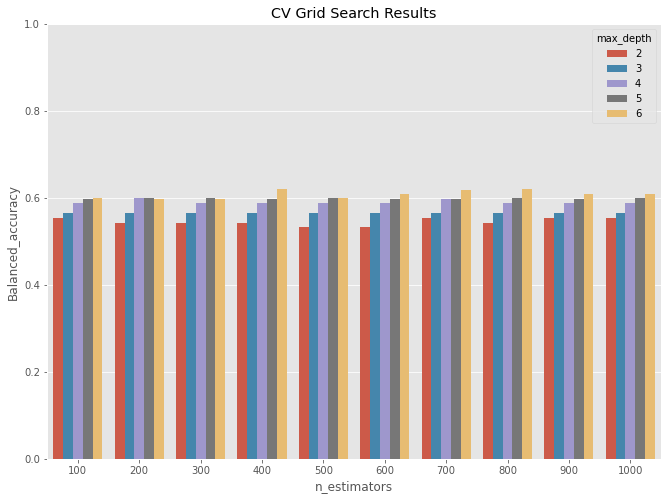

In [209]:
fig = plot_cv_results(grid_tree.cv_results_, 'n_estimators', 'max_depth')
plt.savefig('./Metrics/figure_re/DILI_rf.jpg')

In [205]:
params = {
    'C' : [0.01, 0.01,0.1, 1, 10, 100],
    'gamma' : [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]
}

In [206]:
model = SVC()
grid = GridSearchCV(model, params, scoring='balanced_accuracy', cv=5, refit = True, n_jobs=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=5,
             param_grid={'C': [0.01, 0.01, 0.1, 1, 10, 100],
                         'gamma': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='balanced_accuracy')

In [207]:
print('best parameters : ', grid.best_params_)
em = grid.best_estimator_
pred = em.predict(X_val)
print('accuracy: ', accuracy_score(y_val, pred))
print('balanced accuracy: ', balanced_accuracy_score(y_val, pred))
print('recall: ', recall_score(y_val, pred))
print('precision: ', precision_score(y_val, pred))
print('F1: ', f1_score(y_val, pred))

best parameters :  {'C': 100, 'gamma': 0.0001}
accuracy:  0.9753363228699552
balanced accuracy:  0.6655065738592421
recall:  0.3333333333333333
precision:  0.8333333333333334
F1:  0.47619047619047616


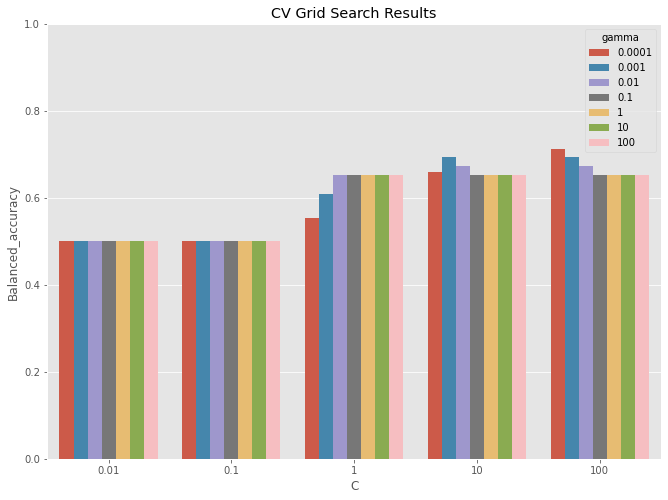

In [210]:
fig = plot_cv_results(grid.cv_results_, 'C', 'gamma')
plt.savefig('./Metrics/figure_re/DILI_svm.jpg')

In [220]:
params = {
    'n_neighbors' : [1,3,5,7,9,11],
    'weights' : ["uniform", "distance"]
}

In [221]:
model = KNeighborsClassifier()
grid = GridSearchCV(model, params, scoring='balanced_accuracy', cv=5, refit = True, n_jobs=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=5,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='balanced_accuracy')

In [222]:
print('best parameters : ', grid.best_params_)
em = grid.best_estimator_
pred = em.predict(X_val)
print('accuracy: ', accuracy_score(y_val, pred))
print('balanced accuracy: ', balanced_accuracy_score(y_val, pred))
print('recall: ', recall_score(y_val, pred))
print('precision: ', precision_score(y_val, pred))
print('F1: ', f1_score(y_val, pred))

best parameters :  {'n_neighbors': 3, 'weights': 'distance'}
accuracy:  0.9775784753363229
balanced accuracy:  0.7310131477184841
recall:  0.4666666666666667
precision:  0.7777777777777778
F1:  0.5833333333333334


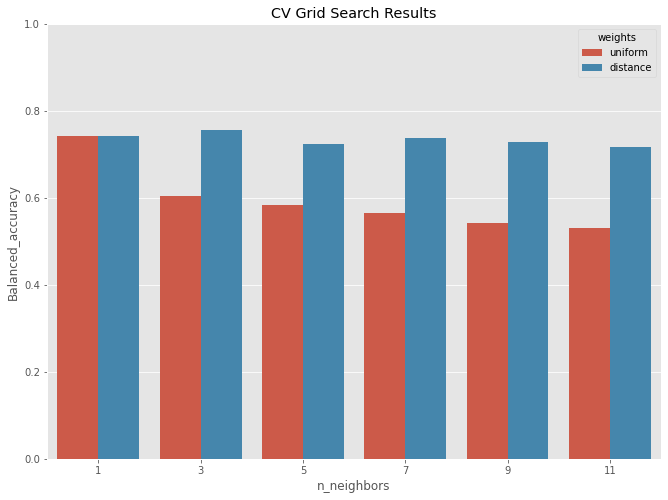

In [223]:
fig = plot_cv_results(grid.cv_results_, 'n_neighbors', 'weights')
plt.savefig('./Metrics/figure_re/DILI_knn.jpg')

In [224]:
params = {
    'max_depth' : [2,3,4,5,6],
    'n_estimators' : [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
}

In [225]:
model = LGBMClassifier()
grid = GridSearchCV(model, params, scoring='balanced_accuracy', cv=5, refit = True, n_jobs=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=5,
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800, 900, 1000]},
             scoring='balanced_accuracy')

In [226]:
print('best parameters : ', grid.best_params_)
em = grid.best_estimator_
pred = em.predict(X_val)
print('accuracy: ', accuracy_score(y_val, pred))
print('balanced accuracy: ', balanced_accuracy_score(y_val, pred))
print('recall: ', recall_score(y_val, pred))
print('precision: ', precision_score(y_val, pred))
print('F1: ', f1_score(y_val, pred))

best parameters :  {'max_depth': 4, 'n_estimators': 200}
accuracy:  0.9865470852017937
balanced accuracy:  0.8
recall:  0.6
precision:  1.0
F1:  0.7499999999999999


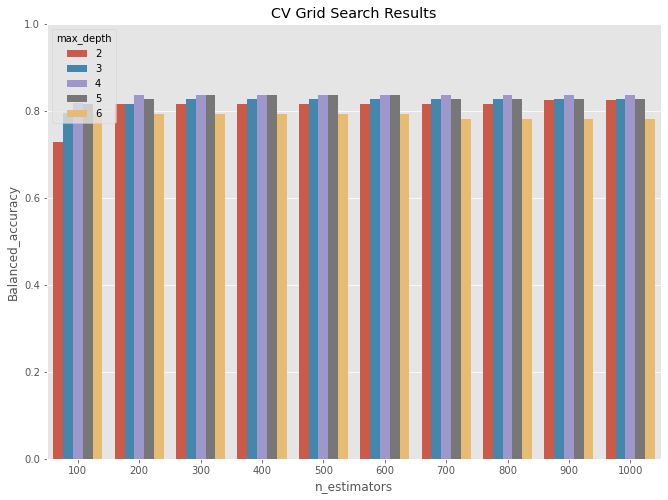

In [228]:
fig = plot_cv_results(grid.cv_results_, 'n_estimators', 'max_depth')
plt.savefig('./Metrics/figure_re/DILI_lgbm.jpg')

# AMES

1    56.009281
0    43.990719
Name: Mutagenicity, dtype: float64


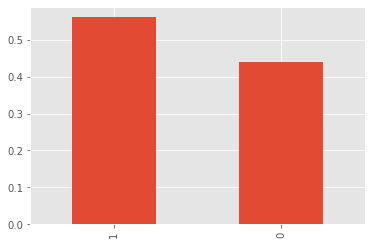

In [26]:
df_raw = pd.read_csv('AMES Mutagenesis/final/AMES_GSD.csv', index_col=0) # Need to input Binary class Data
df_raw

df_raw.Mutagenicity.value_counts(normalize=True).plot(kind='bar')
print(df_raw.Mutagenicity.value_counts(normalize=True)*100)

df = df_raw.iloc[:, 3:]
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [27]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

best parameters :  {'max_depth': 5, 'n_estimators': 300}


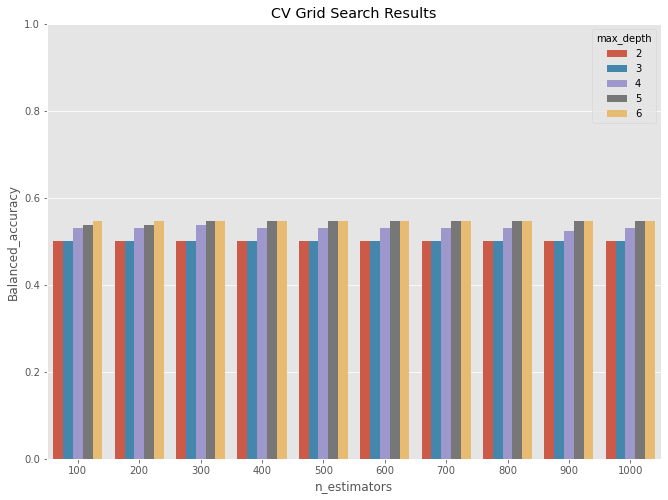

In [29]:
params = {
    'max_depth' : [2,3,4,5,6],
    'n_estimators' : [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
}

model = RandomForestClassifier()
grid = GridSearchCV(model, params, scoring='balanced_accuracy', cv=5, refit = True, n_jobs=5)
grid.fit(X_train, y_train)
print('best parameters : ', grid.best_params_)

fig = plot_cv_results(grid.cv_results_, 'n_estimators', 'max_depth')
plt.savefig('./Metrics/figure_re/AMES_rf.jpg')

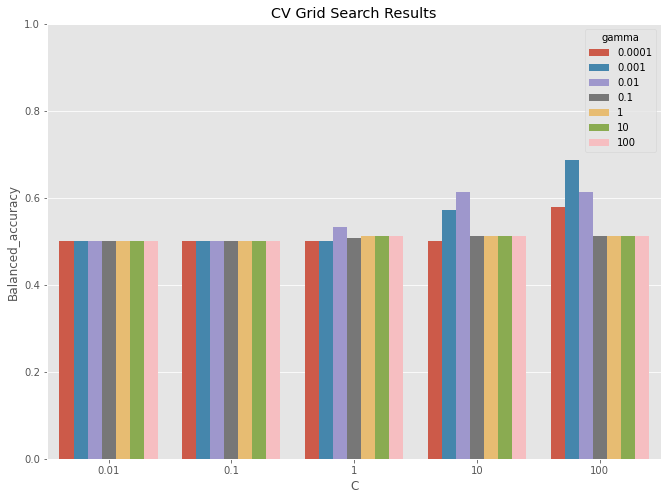

In [234]:
params = {
    'C' : [0.01, 0.01,0.1, 1, 10, 100],
    'gamma' : [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]
}
model = SVC()
grid = GridSearchCV(model, params, scoring='balanced_accuracy', cv=5, refit = True, n_jobs=5)
grid.fit(X_train, y_train)
print('best parameters : ', grid.best_params_)

fig = plot_cv_results(grid.cv_results_, 'C', 'gamma')
plt.savefig('./Metrics/figure_re/AMES_svm.jpg')

best parameters :  {'n_neighbors': 1, 'weights': 'uniform'}


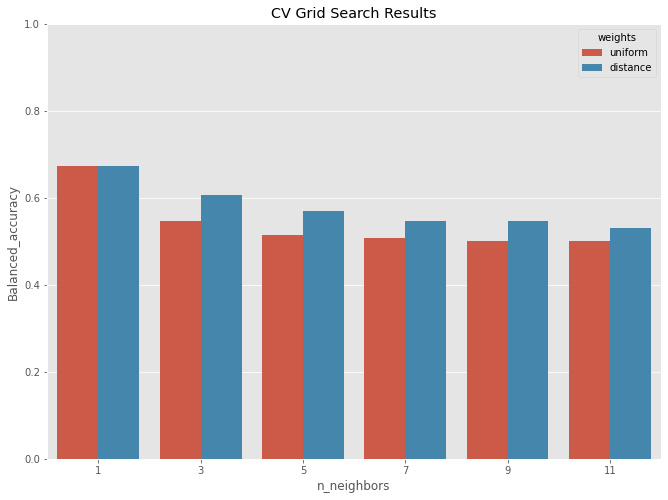

In [30]:
params = {
    'n_neighbors' : [1,3,5,7,9,11],
    'weights' : ["uniform", "distance"]
}
model = KNeighborsClassifier()
grid = GridSearchCV(model, params, scoring='balanced_accuracy', cv=5, refit = True, n_jobs=5)
grid.fit(X_train, y_train)
print('best parameters : ', grid.best_params_)

fig = plot_cv_results(grid.cv_results_, 'n_neighbors', 'weights')
plt.savefig('./Metrics/figure_re/AMES_knn.jpg')

best parameters :  {'max_depth': 3, 'n_estimators': 900}


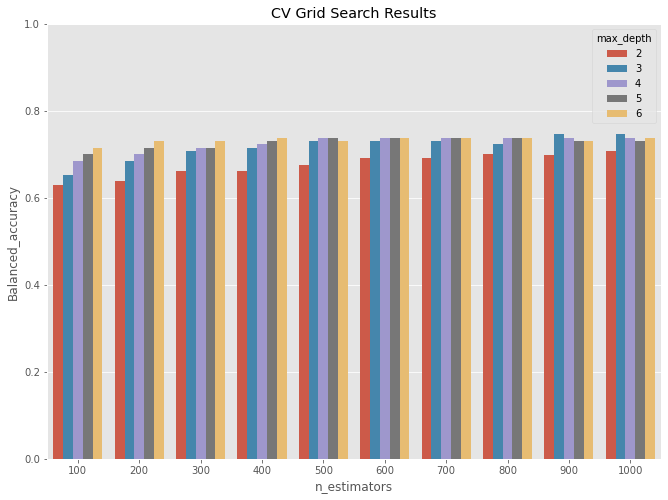

In [31]:
params = {
    'max_depth' : [2,3,4,5,6],
    'n_estimators' : [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
}
model = LGBMClassifier()
grid = GridSearchCV(model, params, scoring='balanced_accuracy', cv=5, refit = True, n_jobs=5)
grid.fit(X_train, y_train)
print('best parameters : ', grid.best_params_)

fig = plot_cv_results(grid.cv_results_, 'n_estimators', 'max_depth')
plt.savefig('./Metrics/figure_re/AMES_lgbm.jpg')

# hERG

1    58.355514
0    41.644486
Name: hERG, dtype: float64


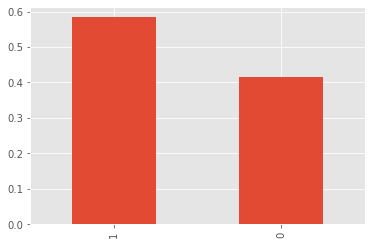

In [32]:
df_raw = pd.read_csv('hERG/final/hERG_GSD.csv', index_col=0) # Need to input Binary class Data
df_raw

df_raw.hERG.value_counts(normalize=True).plot(kind='bar')
print(df_raw.hERG.value_counts(normalize=True)*100)

df = df_raw.iloc[:, 3:]
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [33]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

best parameters :  {'max_depth': 6, 'n_estimators': 100}


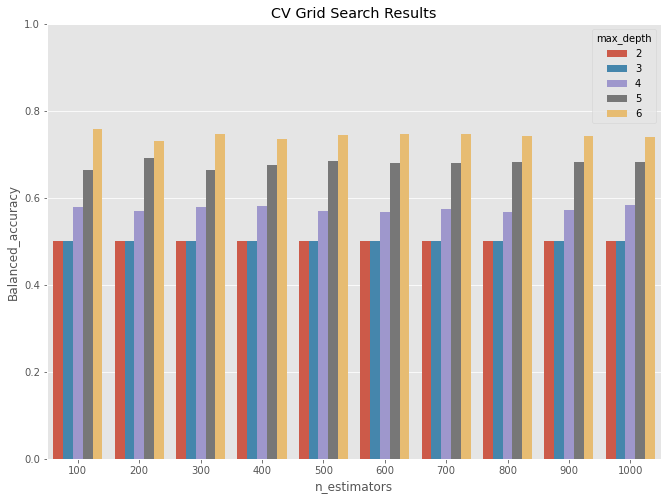

In [35]:
params = {
    'max_depth' : [2,3,4,5,6],
    'n_estimators' : [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
}

model = RandomForestClassifier()
grid = GridSearchCV(model, params, scoring='balanced_accuracy', cv=5, refit = True, n_jobs=5)
grid.fit(X_train, y_train)
print('best parameters : ', grid.best_params_)

fig = plot_cv_results(grid.cv_results_, 'n_estimators', 'max_depth')
plt.savefig('./Metrics/figure_re/hERG_rf.jpg')

In [ ]:
params = {
    'C' : [0.01, 0.01,0.1, 1, 10, 100],
    'gamma' : [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]
}
model = SVC()
grid = GridSearchCV(model, params, scoring='balanced_accuracy', cv=5, refit = True, n_jobs=5)
grid.fit(X_train, y_train)
print('best parameters : ', grid.best_params_)

fig = plot_cv_results(grid.cv_results_, 'C', 'gamma')
plt.savefig('./Metrics/figure_re/hERG_svm.jpg')

best parameters :  {'n_neighbors': 1, 'weights': 'uniform'}


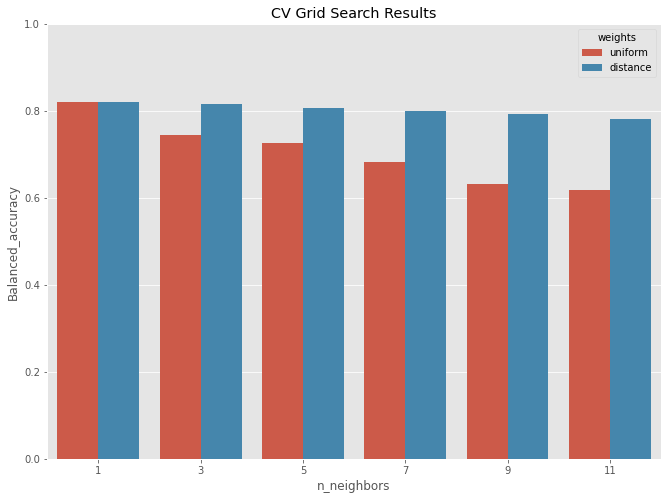

In [36]:
params = {
    'n_neighbors' : [1,3,5,7,9,11],
    'weights' : ["uniform", "distance"]
}
model = KNeighborsClassifier()
grid = GridSearchCV(model, params, scoring='balanced_accuracy', cv=5, refit = True, n_jobs=5)
grid.fit(X_train, y_train)
print('best parameters : ', grid.best_params_)

fig = plot_cv_results(grid.cv_results_, 'n_neighbors', 'weights')
plt.savefig('./Metrics/figure_re/hERG_knn.jpg')

best parameters :  {'max_depth': 2, 'n_estimators': 1000}


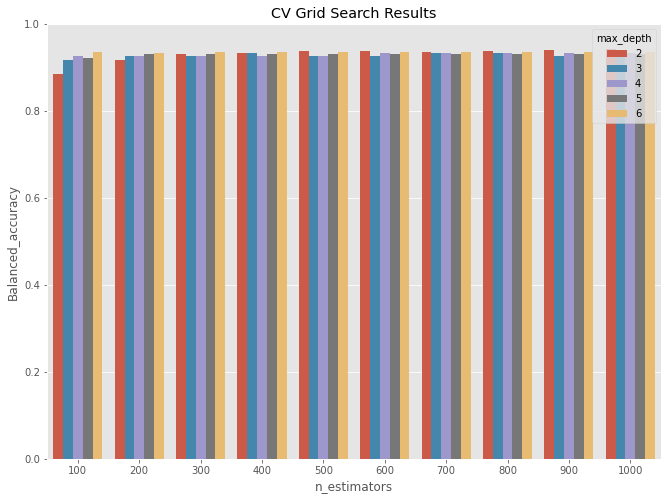

In [37]:
params = {
    'max_depth' : [2,3,4,5,6],
    'n_estimators' : [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
}
model = LGBMClassifier()
grid = GridSearchCV(model, params, scoring='balanced_accuracy', cv=5, refit = True, n_jobs=5)
grid.fit(X_train, y_train)
print('best parameters : ', grid.best_params_)

fig = plot_cv_results(grid.cv_results_, 'n_estimators', 'max_depth')
plt.savefig('./Metrics/figure_re/hERG_lgbm.jpg')

# EPA

3.0    49.906335
2.0    22.411444
4.0    19.337534
1.0     8.344687
Name: EPA_category, dtype: float64


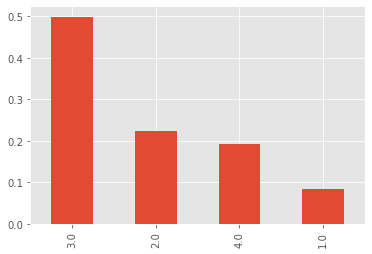

In [38]:
df_raw = pd.read_csv('Acute Oral Toxicity/final/AOT_EPA_GSD.csv', index_col=0) # Need to input Binary class Data
df_raw

df_raw.EPA_category.value_counts(normalize=True).plot(kind='bar')
print(df_raw.EPA_category.value_counts(normalize=True)*100)

df = df_raw.iloc[:, 3:]
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [39]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

best parameters :  {'max_depth': 6, 'n_estimators': 300}


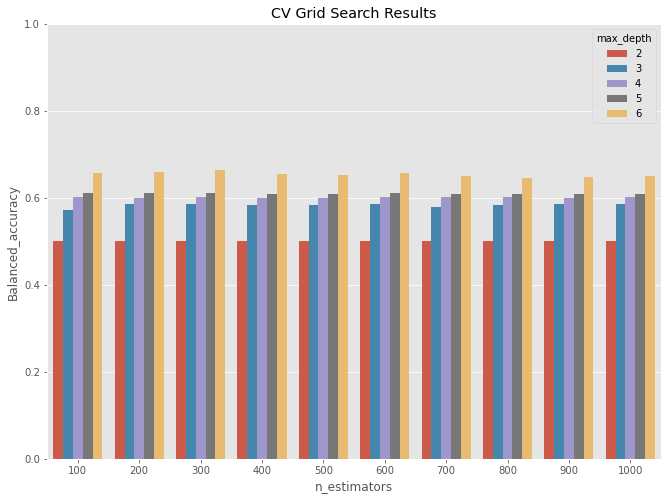

In [40]:
params = {
    'max_depth' : [2,3,4,5,6],
    'n_estimators' : [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
}

model = RandomForestClassifier()
grid = GridSearchCV(model, params, scoring='balanced_accuracy', cv=5, refit = True, n_jobs=5)
grid.fit(X_train, y_train)
print('best parameters : ', grid.best_params_)

fig = plot_cv_results(grid.cv_results_, 'n_estimators', 'max_depth')
plt.savefig('./Metrics/figure_re/EPA_rf.jpg')

best parameters :  {'n_neighbors': 1, 'weights': 'uniform'}


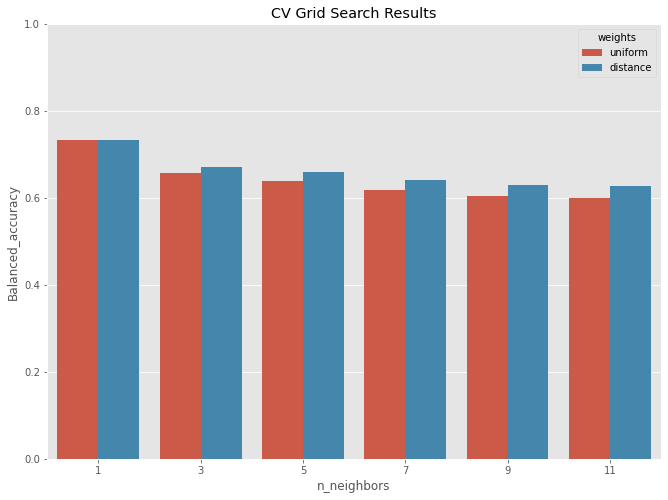

In [41]:
params = {
    'n_neighbors' : [1,3,5,7,9,11],
    'weights' : ["uniform", "distance"]
}
model = KNeighborsClassifier()
grid = GridSearchCV(model, params, scoring='balanced_accuracy', cv=5, refit = True, n_jobs=5)
grid.fit(X_train, y_train)
print('best parameters : ', grid.best_params_)

fig = plot_cv_results(grid.cv_results_, 'n_neighbors', 'weights')
plt.savefig('./Metrics/figure_re/EPA_knn.jpg')

In [ ]:
params = {
    'C' : [0.01, 0.01,0.1, 1, 10, 100],
    'gamma' : [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]
}
model = SVC()
grid = GridSearchCV(model, params, scoring='balanced_accuracy', cv=5, refit = True, n_jobs=5)
grid.fit(X_train, y_train)
print('best parameters : ', grid.best_params_)

fig = plot_cv_results(grid.cv_results_, 'C', 'gamma')
plt.savefig('./Metrics/figure_re/EPA_svm.jpg')

best parameters :  {'max_depth': 5, 'n_estimators': 1000}


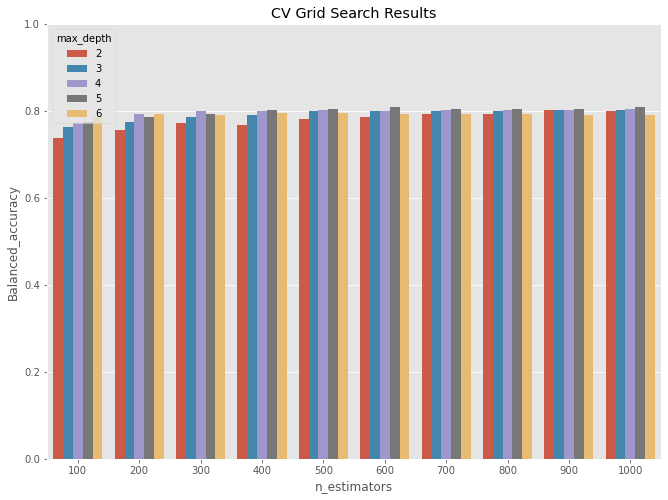

In [42]:
params = {
    'max_depth' : [2,3,4,5,6],
    'n_estimators' : [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
}
model = LGBMClassifier()
grid = GridSearchCV(model, params, scoring='balanced_accuracy', cv=5, refit = True, n_jobs=5)
grid.fit(X_train, y_train)
print('best parameters : ', grid.best_params_)

fig = plot_cv_results(grid.cv_results_, 'n_estimators', 'max_depth')
plt.savefig('./Metrics/figure_re/EPA_lgbm.jpg')

# GHS

5.0    42.944059
4.0    35.279703
3.0    13.495014
2.0     6.354572
1.0     1.926652
Name: GHS_category, dtype: float64


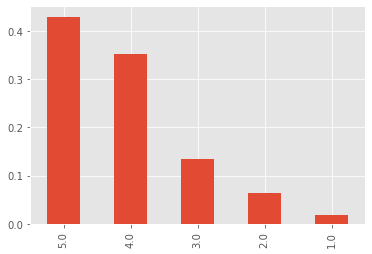

In [43]:
df_raw = pd.read_csv('Acute Oral Toxicity/final/AOT_GHS_GSD.csv', index_col=0) # Need to input Binary class Data
df_raw

df_raw.GHS_category.value_counts(normalize=True).plot(kind='bar')
print(df_raw.GHS_category.value_counts(normalize=True)*100)

df = df_raw.iloc[:, 3:]
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [44]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

best parameters :  {'max_depth': 6, 'n_estimators': 1000}


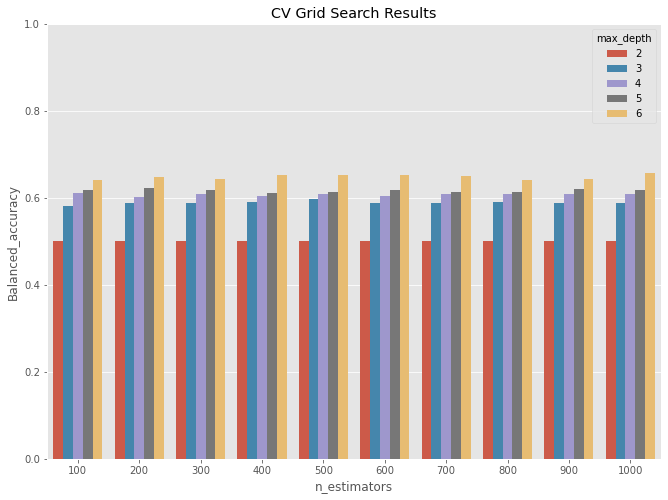

In [45]:
params = {
    'max_depth' : [2,3,4,5,6],
    'n_estimators' : [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
}

model = RandomForestClassifier()
grid = GridSearchCV(model, params, scoring='balanced_accuracy', cv=5, refit = True, n_jobs=5)
grid.fit(X_train, y_train)
print('best parameters : ', grid.best_params_)

fig = plot_cv_results(grid.cv_results_, 'n_estimators', 'max_depth')
plt.savefig('./Metrics/figure_re/GHS_rf.jpg')

best parameters :  {'n_neighbors': 1, 'weights': 'uniform'}


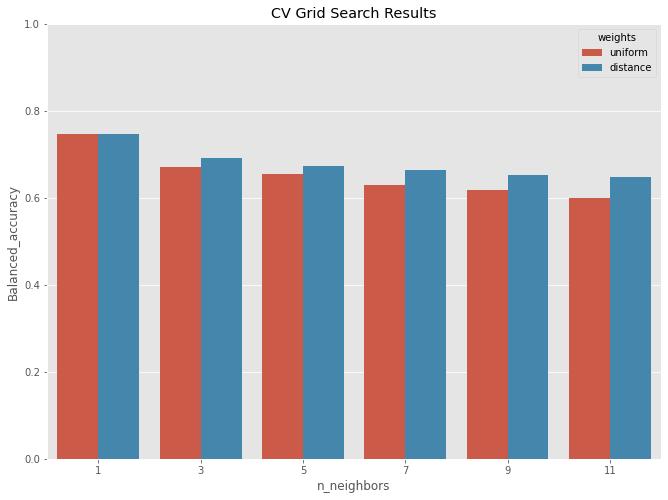

In [46]:
params = {
    'n_neighbors' : [1,3,5,7,9,11],
    'weights' : ["uniform", "distance"]
}
model = KNeighborsClassifier()
grid = GridSearchCV(model, params, scoring='balanced_accuracy', cv=5, refit = True, n_jobs=5)
grid.fit(X_train, y_train)
print('best parameters : ', grid.best_params_)

fig = plot_cv_results(grid.cv_results_, 'n_neighbors', 'weights')
plt.savefig('./Metrics/figure_re/GHS_knn.jpg')

best parameters :  {'max_depth': 2, 'n_estimators': 800}


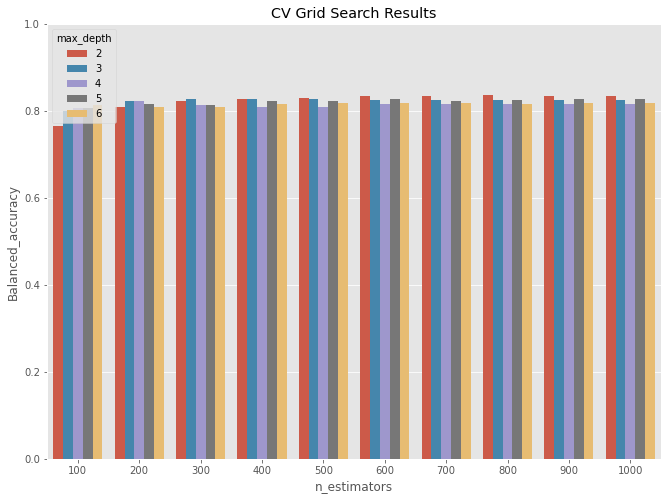

In [47]:
params = {
    'max_depth' : [2,3,4,5,6],
    'n_estimators' : [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
}
model = LGBMClassifier()
grid = GridSearchCV(model, params, scoring='balanced_accuracy', cv=5, refit = True, n_jobs=5)
grid.fit(X_train, y_train)
print('best parameters : ', grid.best_params_)

fig = plot_cv_results(grid.cv_results_, 'n_estimators', 'max_depth')
plt.savefig('./Metrics/figure_re/GHS_lgbm.jpg')

# LD50

In [52]:
df_raw = pd.read_csv('Acute Oral Toxicity/final/AOT_LD50_GSD.csv', index_col=0) # Need to input Binary class Data
df_raw

df = df_raw.iloc[:, 3:]
X = df.iloc[:,1:]
y = df.iloc[:,0]

best parameters :  {'max_depth': 6, 'n_estimators': 400}


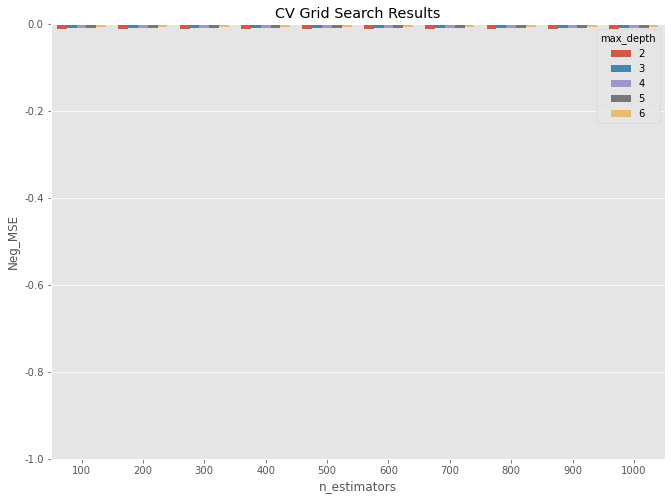

In [53]:
params = {
    'max_depth' : [2,3,4,5,6],
    'n_estimators' : [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
}

model = RandomForestRegressor()
grid = GridSearchCV(model, params, scoring='neg_mean_squared_error', cv=5, refit = True, n_jobs=5)
grid.fit(X_train, y_train)
print('best parameters : ', grid.best_params_)

fig = plot_cv_results_reg(grid.cv_results_, 'n_estimators', 'max_depth')
plt.savefig('Z:/users/kangbeenk/개인연구/Figure/LD50_rf.jpg')

best parameters :  {'max_depth': 6, 'n_estimators': 1000}


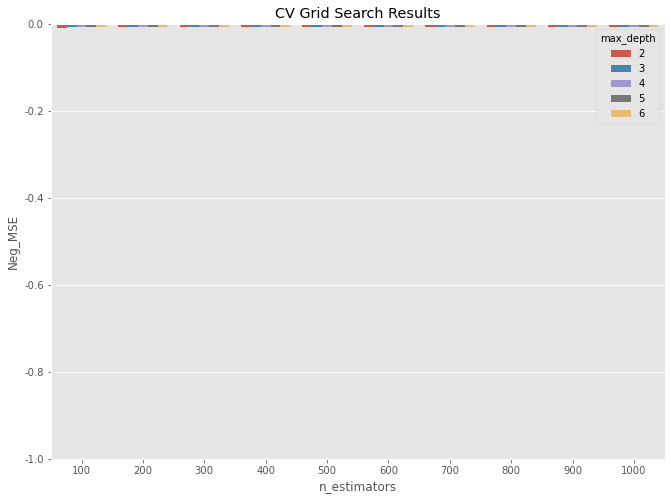

In [54]:
params = {
    'max_depth' : [2,3,4,5,6],
    'n_estimators' : [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
}
model = LGBMRegressor()
grid = GridSearchCV(model, params, scoring='neg_mean_squared_error', cv=5, refit = True, n_jobs=5)
grid.fit(X_train, y_train)
print('best parameters : ', grid.best_params_)

fig = plot_cv_results_reg(grid.cv_results_, 'n_estimators', 'max_depth')
plt.savefig('Z:/users/kangbeenk/개인연구/Figure/LD50_lgbm.jpg')